In [2]:
# Import the necessary libraries
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from random import randint
import pickle
import os
np.random.seed(42)
import matplotlib.pyplot as plt
%matplotlib inline
print('Creating the image classification model of integers 0-9')

Creating the image classification model of integers 0-9


In [3]:
# Fetch data
mnist = fetch_openml('mnist_784')

In [4]:
# store the 'data' and 'target' sections of the dataset in an X and y array as those will be the data points and labels respectively
X = np.array(mnist['data'])
y = np.array(mnist['target'])
y = y.astype(np.uint8)  # Optimization

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  96. 121. 121. 121.
 121. 190. 121. 190. 190. 162. 218. 121. 121. 108.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.  46. 107. 219. 249. 252. 252. 252.
 252. 252. 253. 252. 252. 252. 252. 252. 252. 251. 240. 240.   0.   0.
   0. 

([], [])

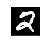

In [6]:
# Train-test split to 60000-10000
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

2          4          0          1          6          6          9          0          3          4          

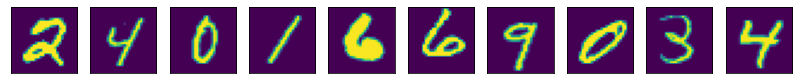

In [47]:
# Visualize data
plt.figure(1, figsize=(14,3))

for i in range(10):
    print(y_train[i], end='          ')
    plt.subplot(1,10,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([])

In [ ]:
# Train gradient descent classifier
size = 1000  # Change this value to make the train dataset smaller (less accurate, but trains faster)
X_train_small = X_train[:size]
y_train_small = y_train[:size] 
X_train_small = X_train
y_train_small = y_train
print(X_train_small.shape, y_train_small.shape)
classifier = SGDClassifier(random_state=42)
classifier.fit(X_train_small, y_train_small)

(60000, 784) (60000,)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [49]:
# Test SGD Classifier
from random import randint
a = randint(0, 9999)
print(classifier.predict(X_test[a].reshape(1, 784)), y_test[a])
plt.imshow(X_test[a].reshape(28, 28), cmap='gray', interpolation='nearest')
plt.show()

NameError: name 'classifier' is not defined

In [ ]:
# Calculate accuracy
y_pred = []
for i in X_test:
  y_pred.append(classifier.predict(i.reshape(1, 784)))
y_pred = np.array(y_pred)
print(accuracy_score(y_test, y_pred))

0.8691


In [8]:
# Save model
pkl_file = "pickle_model.pkl"
with open(pkl_file, 'wb') as file:
  pickle.dump(classifier, file)

NameError: name 'classifier' is not defined

[1] 1
C:\Users\notif\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator SGDClassifier from version 0.22.2.post1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


([], [])

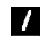

In [28]:
# Run Saved Model
pkl_file = "model.pkl"
a = randint(0, 9999)
with open(pkl_file, 'rb') as file:
    model = pickle.load(file)

print(
    model.predict(X_test[a].reshape(1, 784)),
    y_test[a]
)

plt.subplot(1,10,1)
plt.imshow(X_test[a].reshape(28,28), cmap='gray', interpolation='nearest')
plt.xticks([])
plt.yticks([])